In [1]:
import cadquery as cq
from cadquery import exporters
from jupyter_cadquery.cadquery import (PartGroup, Part, Edges, Faces, Vertices, show, 
                                       replay, enable_replay, disable_replay, reset_replay)
from jupyter_cadquery import open_viewer, set_defaults

from math import sin, radians, sqrt

import ipywidgets as widgets

Overwriting auto display for cadquery Workplane and Shape


In [2]:
set_defaults(control="orbit", axes=True, axes0=True, grid=(True, False, False), glass=True)

#open_viewer("Cadquery")
replay_box = widgets.Checkbox(False, description='Enable Replay')
out = widgets.Output()
display(replay_box)
display(out)

@out.capture()
def changed(e):
    if e["new"]:
        enable_replay(warning=False)
    else:
        disable_replay()

replay_box.observe(changed, names='value')

Checkbox(value=False, description='Enable Replay')

Output()

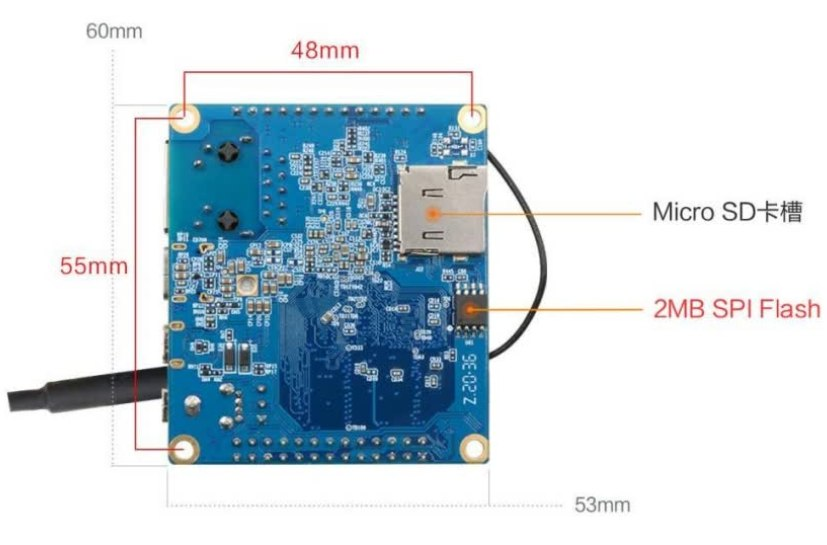

In [3]:
hole_offset = 2#9
mount_hole_spacing = 31.5
pcb_hole_spacing = 48

screw_d = 2
screw_head_d = 4

screw2_d = 3

thickness = 2
z = 4
x = pcb_hole_spacing + screw_head_d + thickness*2
y = screw_head_d + thickness*2

screw1_holes = [(-mount_hole_spacing/2, 0), (mount_hole_spacing/2, 0)]
screw2_holes = [(-pcb_hole_spacing/2, 0), (pcb_hole_spacing/2, 0)]

r = (
    cq.Workplane("XY")
    .box(x, y, z)
    .edges("|Z")
    .fillet(y/2-0.0001)
    #######################
    .faces("<Z").workplane()
    .center(hole_offset, 0)
    .pushPoints(screw1_holes)
    .cboreHole(screw_d, screw_head_d, z/2)
    #######################
    .faces("<Z").workplane(centerOption="CenterOfBoundBox")
    .pushPoints(screw2_holes)
    .circle(y/2)
    .extrude(3, clean=False)
    .faces("<Z").workplane()
    .pushPoints(screw2_holes)
    .hole(screw2_d)
)

replay(r)

Replay is not enabled. To do so call 'enable_replay()'. Falling back to 'show()'


CadViewerWidget(anchor=None, cad_width=640, glass=True, height=600, pinning=False, theme='light', title=None, …

In [4]:
exporters.export(r, '/tmp/x.stl')

In [10]:
r = cq.Workplane("XY").circle(6.5/2).extrude(5).faces(">Z").workplane().circle(5.5/2).extrude(5)

replay(r)
exporters.export(r, '/tmp/x.stl')

Replay is not enabled. To do so call 'enable_replay()'. Falling back to 'show()'


CadViewerWidget(anchor=None, cad_width=640, glass=True, height=600, pinning=False, theme='light', title=None, …